# Training and model evaluation

In this notebook you should write a script for training your model. It can be used to show to the client some intricacies of the model and dataset. Each cell already loads the functions you'll need to use (you are free to change or rearrange). Before executing the cells below, remember to select the correct kernel.

In [14]:
# Automatically re-import files when updated
%load_ext autoreload
%autoreload 2

# using HTML,CSS and JavaScript in code cells
from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

In [2]:
from data_loader import load_data, split_train_test
from visualizers import plot_data_set

# Create a train-test split
raw_data = load_data()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible                61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [21]:
def dataset_cell_output(): display( HTML( """

<style>
  @font-face {
    font-family: "Permanent Marker";
    font-style: normal;
    font-weight: 400;
    src: url("https://fonts.gstatic.com/s/permanentmarker/v15/Fh4uPpkuhYWS4e6k2ACzkIfHa3p9QZwT8g.ttf")
      format("truetype");
  }
  body {
    font-family: sans-serif; /* Using the default system font */
    background-color: transparent; /* Transparent background */
    margin: 0;
    padding: 20px;
  }
  .container {
    display: flex;
    margin-bottom: 20px;
  }
  .left-card {
    flex: 1; /* Takes up 1/4 of the width */
    max-width: 25%;
    background: #181818; /* Lighter background for card */
    border-radius: 8px;
    border: 1px solid #37373c; /* Border color */
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
    text-align: center;
    margin-right: 20px; /* Space between the cards */
    background-image: url("assets/svg/mushroom_bg.svg"); /* Add your SVG here */
    background-size: cover; /* Ensures SVG doesn't resize card */
    background-position: center;
    background-repeat: repeat;
  }
  .right-card {
    flex: 3; /* Takes up 3/4 of the width */
    max-width: 75%;
    background: #181818; /* Lighter background for card */
    border-radius: 8px;
    border: 1px solid #37373c; /* Border color */
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
  }
  .big-number {
    font-size: 400px; /* Increased font size to 400px */
    font-family: "Permanent Marker", sans-serif; /* Use Protest Guerrilla font */
    color: white; /* Dark shade for the number */
  }
  h2,
  h3,
  p {
    color: white; /* Black or shades of black */
  }
  p {
    font-size: 16px;
  }
  label {
    font-size: 16px;
    margin-right: 20px;
    color: white;
  }
  h3 {
    font-size: 18px;
  }
  h2 {
    font-size: 24px;
  }
  .dropdown-container {
    display: flex;
    justify-content: center;
    align-items: center;
    margin: 0 auto; /* Centers horizontally */
    padding-top: 20px;
  }
  .options-container {
    margin-top: 10px;
    line-height: 1.8;
  }
  select {
    padding: 8px;
    font-size: 20px;
  }
  select {
    padding: 10px;
    font-size: 16px;
    background-color: #252526;
    color: white;
    border: 1px solid #fff;
    border-radius: 8px;
    transition: all 0.3s ease-in-out;
    outline: none;
  }
</style>
<div class="container">
  <div class="left-card">
    <div class="big-number">1</div>
  </div>
  <div class="right-card">
    <h2>1<sup>st</sup> Step: Dataset</h2>
    <p>
      The table below provides an overview of the mushroom dataset's features, 
      including the number of non-null values for each column and the data type. 
      It helps identify missing values and understand the structure of the dataset 
      for further analysis.
    </p>
    <div style="display: flex;">
<table style="width: 50%; margin-right: 10px;">
    <thead>
      <tr>
        <th>#</th>
        <th>Column</th>
        <th>Non-Null Count</th>
        <th>Dtype</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>0</td>
        <td>edible</td>
        <td>61069</td>
        <td>int64</td>
      </tr>
      <tr>
        <td>1</td>
        <td>cap-diameter</td>
        <td>61069</td>
        <td>float64</td>
      </tr>
      <tr>
        <td>2</td>
        <td>cap-shape</td>
        <td>61069</td>
        <td>object</td>
      </tr>
      <tr>
        <td>3</td>
        <td>cap-surface</td>
        <td>46949</td>
        <td>object</td>
      </tr>
      <tr>
        <td>4</td>
        <td>cap-color</td>
        <td>61069</td>
        <td>object</td>
      </tr>
      <tr>
        <td>5</td>
        <td>does-bruise-or-bleed</td>
        <td>61069</td>
        <td>object</td>
      </tr>
      <tr>
        <td>6</td>
        <td>gill-attachment</td>
        <td>51185</td>
        <td>object</td>
      </tr>
      <tr>
        <td>7</td>
        <td>gill-spacing</td>
        <td>36006</td>
        <td>object</td>
      </tr>
      <tr>
        <td>8</td>
        <td>gill-color</td>
        <td>61069</td>
        <td>object</td>
      </tr>
      <tr>
        <td>9</td>
        <td>stem-height</td>
        <td>61069</td>
        <td>float64</td>
      </tr>
    </tbody>
  </table>

  <table style="width: 50%;">
    <thead>
      <tr>
        <th>#</th>
        <th>Column</th>
        <th>Non-Null Count</th>
        <th>Dtype</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>10</td>
        <td>stem-width</td>
        <td>61069</td>
        <td>float64</td>
      </tr>
      <tr>
        <td>11</td>
        <td>stem-root</td>
        <td>9531</td>
        <td>object</td>
      </tr>
      <tr>
        <td>12</td>
        <td>stem-surface</td>
        <td>22945</td>
        <td>object</td>
      </tr>
      <tr>
        <td>13</td>
        <td>stem-color</td>
        <td>61069</td>
        <td>object</td>
      </tr>
      <tr>
        <td>14</td>
        <td>veil-type</td>
        <td>3177</td>
        <td>object</td>
      </tr>
      <tr>
        <td>15</td>
        <td>veil-color</td>
        <td>7413</td>
        <td>object</td>
      </tr>
      <tr>
        <td>16</td>
        <td>has-ring</td>
        <td>61069</td>
        <td>object</td>
      </tr>
      <tr>
        <td>17</td>
        <td>ring-type</td>
        <td>58598</td>
        <td>object</td>
      </tr>
      <tr>
        <td>18</td>
        <td>spore-print-color</td>
        <td>6354</td>
        <td>object</td>
      </tr>
      <tr>
        <td>19</td>
        <td>habitat</td>
        <td>61069</td>
        <td>object</td>
      </tr>
      <tr>
        <td>20</td>
        <td>season</td>
        <td>61069</td>
        <td>object</td>
      </tr>
    </tbody>
  </table>
  </div>
  </div>
</div>

""" ) )

In [22]:
dataset_cell_output()

#,Column,Non-Null Count,Dtype
0,edible,61069,int64
1,cap-diameter,61069,float64
2,cap-shape,61069,object
3,cap-surface,46949,object
4,cap-color,61069,object
5,does-bruise-or-bleed,61069,object
6,gill-attachment,51185,object
7,gill-spacing,36006,object
8,gill-color,61069,object
9,stem-height,61069,float64


In [3]:
train_data, test_data = split_train_test(raw_data)

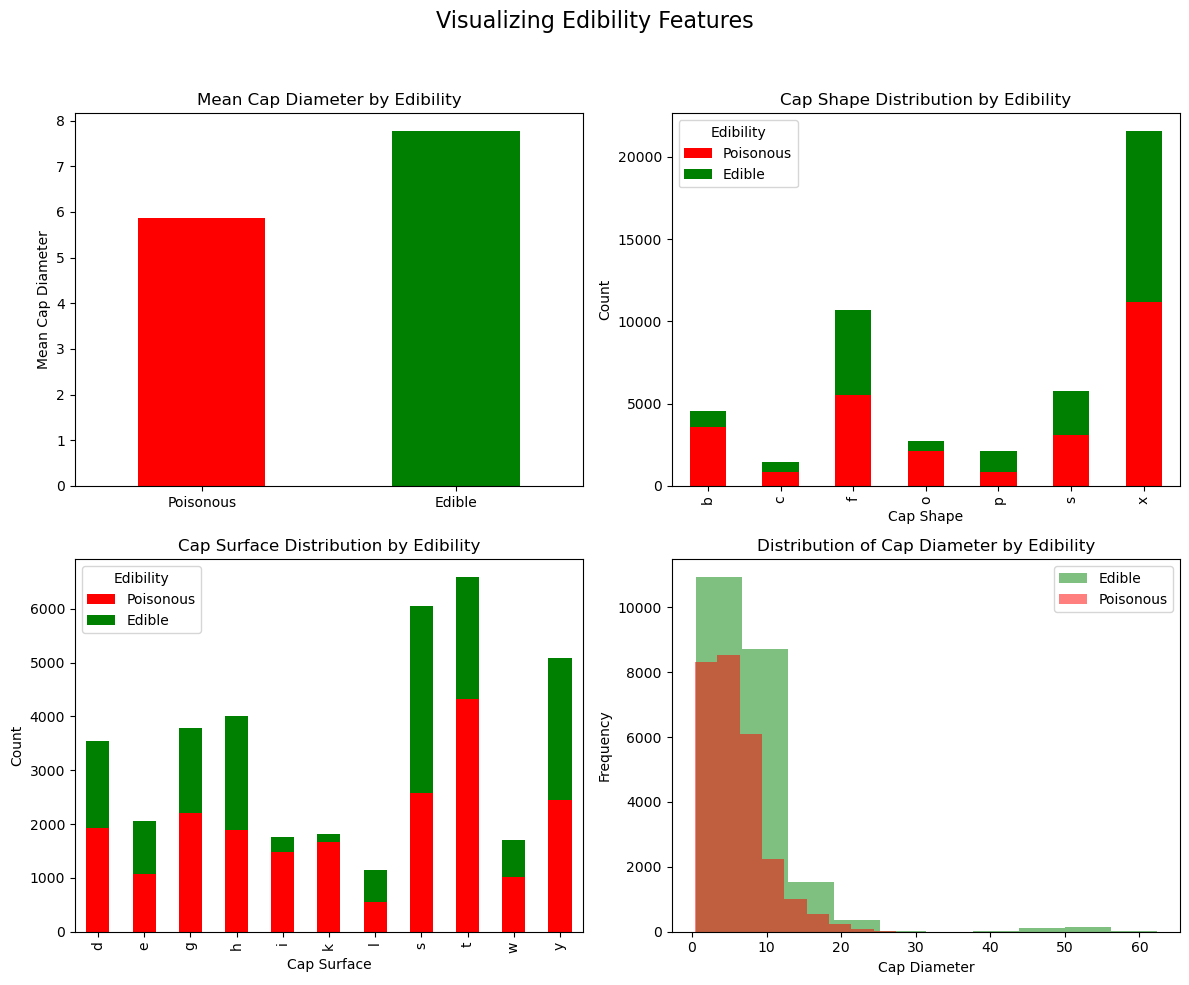

In [4]:
# Visualize some interesting features of the training set
plot_data_set(train_data)

## Pre-processing pipeline

In [38]:
def pipeline_cell_output(): display( HTML( """
<style>
  @font-face {
    font-family: "Permanent Marker";
    font-style: normal;
    font-weight: 400;
    src: url("https://fonts.gstatic.com/s/permanentmarker/v15/Fh4uPpkuhYWS4e6k2ACzkIfHa3p9QZwT8g.ttf")
      format("truetype");
  }
  body {
    font-family: sans-serif;
    background-color: transparent;
    margin: 0;
    padding: 20px;
  }
  .container {
    display: flex;
    margin-bottom: 20px;
  }
  .left-card {
    flex: 1;
    max-width: 25%;
    background: #181818;
    border-radius: 8px;
    border: 1px solid #37373c;
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
    text-align: center;
    margin-right: 20px;
    background-image: url("assets/svg/mushroom_bg.svg");
    background-size: cover;
    background-position: center;
    background-repeat: repeat;
  }
  .right-card {
    flex: 3;
    max-width: 75%;
    background: #181818;
    border-radius: 8px;
    border: 1px solid #37373c;
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
  }
  .big-number {
    font-size: 400px;
    font-family: "Permanent Marker", sans-serif;
    color: white;
  }
  h2,
  h3,
  p {
    color: white;
  }
  p {
    font-size: 16px;
  }
  label {
    font-size: 16px;
    margin-right: 20px;
    color: white;
  }
  h3 {
    font-size: 18px;
  }
  h2 {
    font-size: 24px;
  }
</style>

<div class="container">
  <div class="left-card">
    <div class="big-number">2</div>
  </div>
  <div class="right-card">
    <h2>2<sup>nd</sup> Step: Pre-processing Pipeline</h2>
    <p>
      The following code demonstrates building, training, saving, and applying a machine learning pipeline to both training and testing data.
    </p>
    <div>
      <img src="assets/svg/pipeline.svg" alt="Pipeline process illustration" style="width: 100%; height: auto;" />
    </div>
  </div>
</div>

""" ))

In [39]:
pipeline_cell_output()

In [5]:
from pipelines import apply_pipeline, build_pipeline, save_pipeline, train_pipeline

# <ASSIGNMENT 3.4: Train and apply the pipeline>
X_train, y_train = [], []
X_test, y_test = [], []

# Step 1: Build the pipeline
pipeline = build_pipeline()

# Step 2: Train the pipeline on the training data
trained_pipeline = train_pipeline(pipeline, train_data)

# Step 3: Using the default path, Save the trained pipeline to a file
save_pipeline(trained_pipeline)

# Step 4: Apply the pipeline to the train and test data
X_train, y_train = apply_pipeline(trained_pipeline, train_data)
X_test, y_test = apply_pipeline(trained_pipeline, test_data)



## Modeling

In [31]:
def modeling_cell_output(): display( HTML( """
<style>
  @font-face {
    font-family: "Permanent Marker";
    font-style: normal;
    font-weight: 400;
    src: url("https://fonts.gstatic.com/s/permanentmarker/v15/Fh4uPpkuhYWS4e6k2ACzkIfHa3p9QZwT8g.ttf")
      format("truetype");
  }
  body {
    font-family: sans-serif;
    background-color: transparent;
    margin: 0;
    padding: 20px;
  }
  .container {
    display: flex;
    margin-bottom: 20px;
  }
  .left-card {
    flex: 1;
    max-width: 25%;
    background: #181818;
    border-radius: 8px;
    border: 1px solid #37373c;
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
    text-align: center;
    margin-right: 20px;
    background-image: url("assets/svg/mushroom_bg.svg");
    background-size: cover;
    background-position: center;
    background-repeat: repeat;
  }
  .right-card {
    flex: 3;
    max-width: 75%;
    background: #181818;
    border-radius: 8px;
    border: 1px solid #37373c;
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
  }
  .big-number {
    font-size: 400px;
    font-family: "Permanent Marker", sans-serif;
    color: white;
  }
  h2,
  h3,
  p {
    color: white;
  }
  p {
    font-size: 16px;
  }
  label {
    font-size: 16px;
    margin-right: 20px;
    color: white;
  }
  h3 {
    font-size: 18px;
  }
  h2 {
    font-size: 24px;
  }
</style>

<div class="container">
  <div class="left-card">
    <div class="big-number">3</div>
  </div>
  <div class="right-card">
    <h2>3<sup>rd</sup> Step: Modeling</h2>
    <p>
      This code outlines the steps for building and validating a machine learning model, followed by training the model on the full dataset and saving the final version for future use.
    </p>
    <div>
<p>
      In this step, a model is built and evaluated using cross-validation. The cross-validation scores represent the model's accuracy across 5 different folds of the training data: 
      [0.9988, 0.9995, 0.9998, 0.9994, 0.9995]. These scores are extremely high, indicating that the model performs consistently well on different subsets of the data.
      The mean cross-validation score of 0.9994 shows that, on average, the model has nearly perfect accuracy.
    </p>
    <p>
      The model used here is a <strong>RandomForestClassifier</strong>, which is an ensemble machine learning algorithm. It builds multiple decision trees (50 in this case, as set by 
      <code>n_estimators=50</code>) and combines their results to improve accuracy and avoid overfitting. The <code>random_state=42</code> ensures the results are reproducible 
      by setting a seed for the random number generator.
    </p>
    </div>
  </div>
</div>
""" ))

In [32]:
modeling_cell_output()

In [6]:
from models import build_model, cross_validate_model, save_model, train_model

# <ASSIGNMENT 3.7: Run cross-validation and report scores>
# Step 1: Build the model
model = build_model()

# Step 2: Perform cross-validation
cv_scores = cross_validate_model(model, X_train, y_train)

# Step 3: Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Step 4: Train the model on the full training data
trained_model = train_model(model, X_train, y_train)

# Step 5: Save the trained model
save_model(trained_model)

Cross-validation scores: [0.99877188 0.99948828 0.99979531 0.99938594 0.99948828]
Mean cross-validation score: 0.9993859379797361


RandomForestClassifier(n_estimators=50, random_state=42)

## Model comparison

In [33]:
def comparison_cell_output(): display( HTML("""
<style>
  @font-face {
    font-family: "Permanent Marker";
    font-style: normal;
    font-weight: 400;
    src: url("https://fonts.gstatic.com/s/permanentmarker/v15/Fh4uPpkuhYWS4e6k2ACzkIfHa3p9QZwT8g.ttf")
      format("truetype");
  }
  body {
    font-family: sans-serif;
    background-color: transparent;
    margin: 0;
    padding: 20px;
  }
  .container {
    display: flex;
    margin-bottom: 20px;
  }
  .left-card {
    flex: 1;
    max-width: 25%;
    background: #181818;
    border-radius: 8px;
    border: 1px solid #37373c;
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
    text-align: center;
    margin-right: 20px;
    background-image: url("assets/svg/mushroom_bg.svg");
    background-size: cover;
    background-position: center;
    background-repeat: repeat;
  }
  .right-card {
    flex: 3;
    max-width: 75%;
    background: #181818;
    border-radius: 8px;
    border: 1px solid #37373c;
    box-shadow: 0 2px 10px rgba(0, 0, 0, 0.1);
    padding: 20px;
  }
  .big-number {
    font-size: 400px;
    font-family: "Permanent Marker", sans-serif;
    color: white;
  }
  h2,
  h3,
  p {
    color: white;
  }
  p {
    font-size: 16px;
  }
  label {
    font-size: 16px;
    margin-right: 20px;
    color: white;
  }
  h3 {
    font-size: 18px;
  }
  h2 {
    font-size: 24px;
  }
</style>

<div class="container">
  <div class="left-card">
    <div class="big-number">4</div>
  </div>
  <div class="right-card">
    <h2>4<sup>th</sup> Step: Model Comparison</h2>
    <h3>Most Important Quadrant:</h3>
    <p>
      False Negatives (FN = 3) are the most important quadrant here because it means 3 poisonous mushrooms were incorrectly classified as edible. This is potentially life-threatening, as consuming poisonous mushrooms could cause severe harm or death.
    </p>
    <h3>Trust in the App:</h3>
    <p>
      While the model’s performance is impressive overall (with only 3 false negatives and no false positives), the presence of even a small number of false negatives in this specific application is concerning. These 3 errors represent cases where a user could mistakenly eat a poisonous mushroom, which could have dangerous consequences.
    </p>
    <h3>Practical Recommendation:</h3>
    <p>
      Make it clear to users that the app, while highly accurate, is not foolproof. They should be strongly advised to double-check the identification of any mushroom with a specialist, especially when consuming wild mushrooms.
    </p>
  </div>
</div>
  
  
  """))

In [7]:
from models import finetune_model

# Perform a search over model hyperparameters
finetune_model(model, X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

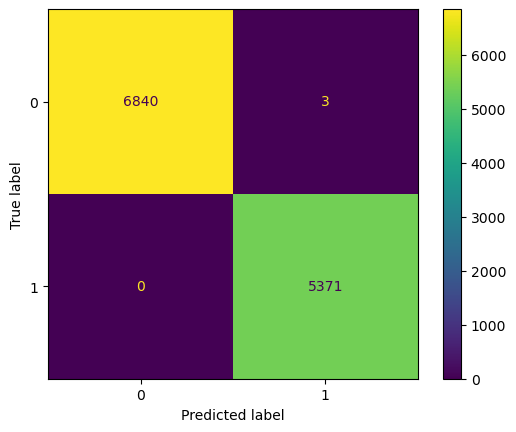

In [8]:
from models import build_model, evaluate_model, save_model, train_model
from visualizers import plot_confusion_matrix

# <ASSIGNMENT 3.9: Train the optimized model and plot the confusion matrix>

# 1. Build the model
model = build_model()

# 2. Train the model
model = train_model(model, X_train, y_train)

# 3. Save the model
save_model(model)

# 4. Evaluate the model
confusion_mat = evaluate_model(model, X_test, y_test)

# 5. Plot the confusion matrix
plot_confusion_matrix(confusion_mat)

In [ ]:
comparison_cell_output()

In [ ]:
# <ASSIGNMENT 3.10: Interpret the confusion matrix and offer a recommendation>

# Please see section number 4 (above ☝️)

In [9]:
# <ASSIGNMENT 3.12: Prepare the notebook for presentation to the client by adding appropriate text and comments>